In [1]:
##Clear the environment
rm(list=ls())

##Turn off scientific notations for numbers
options(scipen = 999)  

##Set locale
Sys.setlocale("LC_ALL", "English") 

##Set seed for reproducibility
set.seed(2345)

# Turn off warnings
options(warn = -1)

getstats <- function(cm){
  # Sensititvity a.k.a TPR
  tpr <-cm[2,2]/(cm[2,2]+cm[2,1])
  fpr <-cm[1,2]/(cm[1,2]+cm[1,1])
  
  # Specificity a.k.a. TNR
  tnr <- cm[1,1]/(cm[1,1]+cm[1,2])
  fnr <- cm[2,1]/(cm[2,1]+cm[2,2])
  
  # Calculate accuracy
  acc <-(cm[2,2]+cm[1,1])/sum(cm)
  err <-(cm[1,2]+cm[2,1])/sum(cm)
  
  #Precision - Positive Predictive Value
  ppv <- cm[2,2]/(cm[2,2]+cm[1,2])
  
  # Negative Predictive Value
  npv <- cm[1,1]/(cm[1,1]+cm[2,1])
  
  rbind(TruePos_Sensitivity=tpr, FalsePos=fpr, TrueNeg_Specificty=tnr, FalseNeg=fnr, PositivePredictiveValue=ppv, NegativePredictiveValue=npv, Accuracy = acc, Error = err)
}

# clean the data names and data
# Use: df<-cleanit(df)
cleanit <-function(df){
  names(df) <-tolower(names(df))
  names(df) <- gsub("\\(","",names(df))
  names(df) <- gsub("\\)","",names(df))
  names(df) <- gsub("\\.","",names(df))
  names(df) <- gsub("_","",names(df))
  names(df) <- gsub("-","",names(df))
  names(df) <- gsub(",","",names(df))
  return(df)
}


[1] "LC_COLLATE=English_United States.1252;LC_CTYPE=English_United States.1252;LC_MONETARY=English_United States.1252;LC_NUMERIC=C;LC_TIME=English_United States.1252"

In [7]:
post <- read.csv("D:/Data/PostSurvey.csv")

In [8]:
str(post)

'data.frame':	214 obs. of  26 variables:
 $ ID              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 1 1 1 1 1 1 2 1 1 ...
 $ age             : int  19 19 18 19 18 19 18 18 18 18 ...
 $ classification  : Factor w/ 5 levels "Freshman","Junior",..: 5 5 1 5 1 5 1 1 1 1 ...
 $ happy           : int  89 90 60 100 85 90 80 75 97 75 ...
 $ sleep_Tues      : num  8 7 9 8.5 8 6 5 8 8 10 ...
 $ sleep_Sat       : num  13 10 9 8.5 10 10 9 10 9 8 ...
 $ hair_color      : Factor w/ 4 levels "black","blond",..: 3 1 3 1 1 3 3 1 2 3 ...
 $ exclusive       : int  1 2 1 10 10 10 5 6 6 10 ...
 $ greek           : Factor w/ 2 levels "no","yes": 1 2 1 1 1 1 1 1 2 1 ...
 $ smoke           : Factor w/ 3 levels "no","only socially",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ talking_min     : int  20 20 30 300 420 3 15 3 7 350 ...
 $ texts_sent      : int  100 50 121 1000 600 100 500 60 45 400 ...
 $ live_campus     : Factor w/ 2 levels "no","yes": 1 1 2 1 2 1 2 2 1 2 ...
 

In [9]:
head(post,5)

,ID,gender,age,classification,happy,sleep_Tues,sleep_Sat,hair_color,exclusive,greek,smoke,talking_min,texts_sent,live_campus,roomates,austin,commute,UT_sport,major,hw_hours_HS,hw_hours_college,post_happy,post_exclusive,post_smoke,post_talking_min,post_text_sent
1,1,Female,19,Sophomore,89,8,13,brown,1,no,no,20,100,no,2,9,I take the bus.,no,Nutrition,0,3,80,1,no,5,50
2,2,Female,19,Sophomore,90,7,10,black,2,yes,no,20,50,no,3,10,I walk.,no,Human Development,2,8,90,1,no,30,60
3,3,Female,18,Freshman,60,9,9,brown,1,no,no,30,121,yes,1,8,I take the bus.,no,Biology,1,6,86,1,no,105,100
4,4,Female,19,Sophomore,100,8.5,8.5,black,10,no,no,300,1000,no,3,8,I walk.,yes,Nursing,0,5,50,10,no,36,250
5,5,Female,18,Freshman,85,8,10,black,10,no,no,420,600,yes,1,8,I walk.,no,Biology,2,31,85,10,no,120,1500


In [10]:
summary(post)

       ID            gender         age          classification
 Min.   :  1.00   Female:190   Min.   :17.00   Freshman :108   
 1st Qu.: 54.25   Male  : 24   1st Qu.:18.00   Junior   : 28   
 Median :107.50                Median :19.00   Other    :  1   
 Mean   :107.50                Mean   :18.99   Senior   :  2   
 3rd Qu.:160.75                3rd Qu.:19.00   Sophomore: 75   
 Max.   :214.00                Max.   :34.00                   
                                                               
     happy          sleep_Tues       sleep_Sat      hair_color 
 Min.   : 20.00   Min.   : 3.000   Min.   : 3.000   black: 61  
 1st Qu.: 75.00   1st Qu.: 6.000   1st Qu.: 7.000   blond: 37  
 Median : 80.00   Median : 7.000   Median : 8.000   brown:113  
 Mean   : 79.43   Mean   : 6.824   Mean   : 7.978   red  :  3  
 3rd Qu.: 90.00   3rd Qu.: 8.000   3rd Qu.: 9.000              
 Max.   :100.00   Max.   :10.000   Max.   :14.000              
                                        

In [12]:
### Lab Question 1

# Make a vector of happiness scores for each sample
underclass_happy <- post$happy[post$classification=='Freshman'|post$classification=='Sophomore']
upperclass_happy <- post$happy[post$classification=='Junior'|post$classification=='Senior']

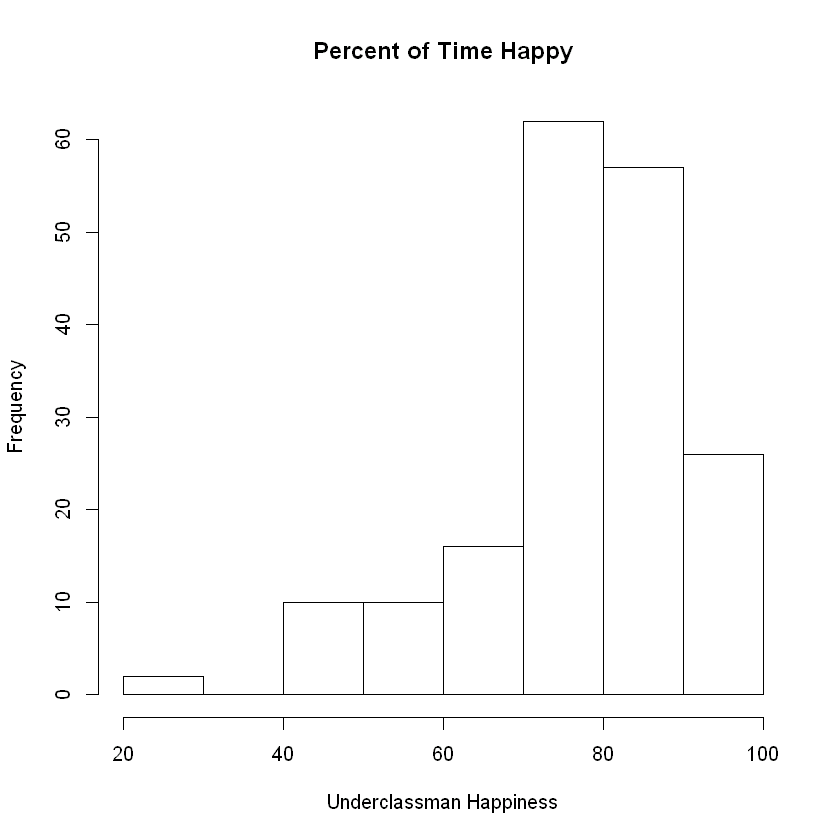

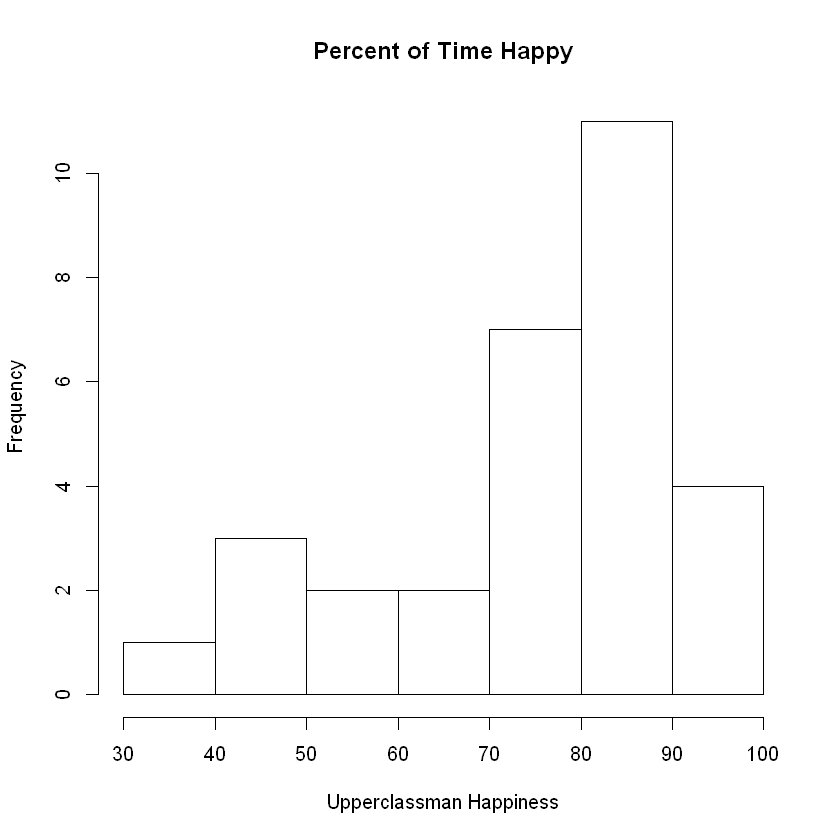

In [13]:
# Check the normality assumption
hist(underclass_happy, xlab='Underclassman Happiness', main='Percent of Time Happy')
hist(upperclass_happy, xlab='Upperclassman Happiness', main='Percent of Time Happy')

In [14]:
# Run independent t-test
t.test(underclass_happy, upperclass_happy)


	Welch Two Sample t-test

data:  underclass_happy and upperclass_happy
t = 0.423, df = 35.358, p-value = 0.6748
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.210391  7.954653
sample estimates:
mean of x mean of y 
 79.67213  78.30000 


In [15]:
## Lab Question 2

# Make a vector of difference scores
post$diff_happy <- post$happy - post$post_happy

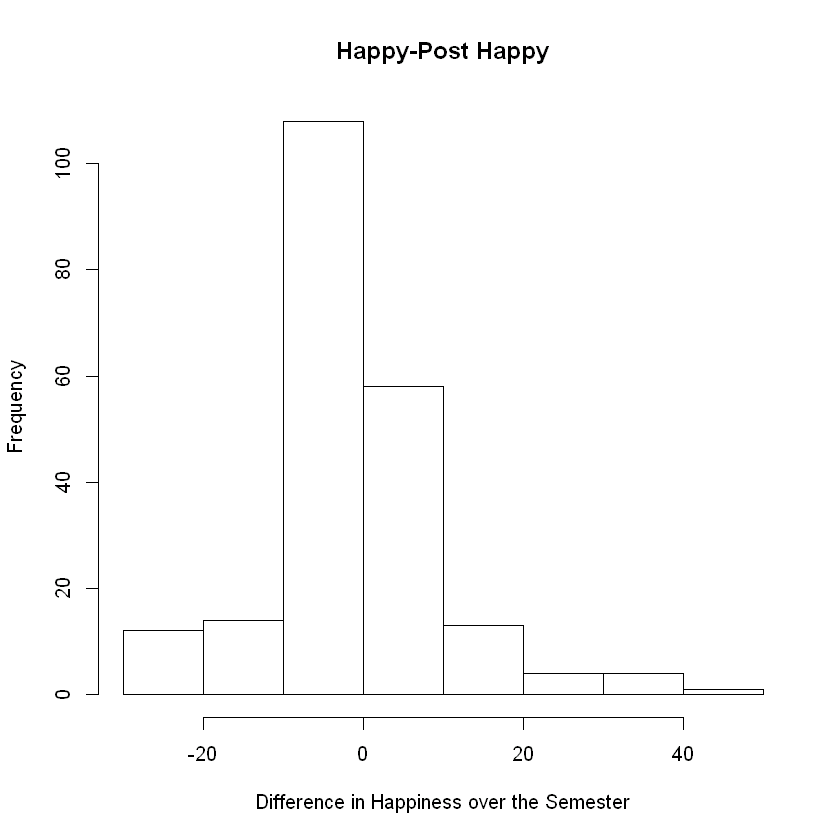

In [16]:
# Check the normality assumption
hist(post$diff_happy, xlab= 'Difference in Happiness over the Semester', main = 'Happy-Post Happy')

In [17]:
# Run dependent t-test
t.test(post$happy, post$post_happy, paired=T)


	Paired t-test

data:  post$happy and post$post_happy
t = 1.6838, df = 213, p-value = 0.09368
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2168971  2.7589532
sample estimates:
mean of the differences 
               1.271028 


In [18]:
#Suppose we wanted to test the happiness scores of those who live on campus against those who live off campus. What has caused the error below?

on_campus <- post[post$live_campus == 'yes',]
off_campus <- post[post$live_campus == 'no',]
on_campus_happy <- on_campus$happy
off_campus_happy <- off_campus$happy
t.test(on_campus_happy, off_campus_happy)



	Welch Two Sample t-test

data:  on_campus_happy and off_campus_happy
t = -1.6358, df = 157.945, p-value = 0.1039
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.2852981  0.6845812
sample estimates:
mean of x mean of y 
 77.52222  80.82258 


## Problem Set

During a professional bull-riding event, riders usually attempt to ride a bull three or more times.  This means that they can record a "ride" (successfully staying on the bull) multiple times in the same event.

Subset the dataset for riders that had at least 1 ride in the 2014 season. Call this dataset new_bull.

Create a new variable or vector for the average number of rides per event for each bull rider in the new_bull dataset:

RidesPerEvent14 <- new_bull$Rides14/new_bull$Events14

Make a histogram of your "rides per event" variable and find the five-number summary for your "rides per event" variable.

In [ ]:
#Subset for riders that participated in at least one event in 2013
new_bull <- bull[bull$Events14  > 0 ,]

In [ ]:
new_bull$RidesPerEvent14<- new_bull$Rides14/new_bull$Events14

In [ ]:
summary(new_bull$RidesPerEvent14)

In [ ]:
hist(new_bull$RidesPerEvent14)
abline(v=median(new_bull$RidesPerEvent14),col="red")
abline(v=mean(new_bull$RidesPerEvent14),col="blue")
fivenum(new_bull$RidesPerEvent14)
mean(new_bull$RidesPerEvent14)
sd(new_bull$RidesPerEvent14)

In [ ]:

plot(new_bull$RidesPerEvent14, new_bull$Rank14)
abline(lm(new_bull$Rank14~new_bull$RidesPerEvent14),col="red")

## Primary Research Question

In 2012, which variable had the strongest linear relationship with Earnings:  Ride Percentage or Cup Points?

In [ ]:
##Clear the environment
rm(list=ls())

##Turn off scientific notations for numbers
options(scipen = 999)  

##Set locale
Sys.setlocale("LC_ALL", "English") 

##Set seed for reproducibility
set.seed(2345)

# Turn off warnings
options(warn = -1)

getstats <- function(cm){
  # Sensititvity a.k.a TPR
  tpr <-cm[2,2]/(cm[2,2]+cm[2,1])
  fpr <-cm[1,2]/(cm[1,2]+cm[1,1])
  
  # Specificity a.k.a. TNR
  tnr <- cm[1,1]/(cm[1,1]+cm[1,2])
  fnr <- cm[2,1]/(cm[2,1]+cm[2,2])
  
  # Calculate accuracy
  acc <-(cm[2,2]+cm[1,1])/sum(cm)
  err <-(cm[1,2]+cm[2,1])/sum(cm)
  
  #Precision - Positive Predictive Value
  ppv <- cm[2,2]/(cm[2,2]+cm[1,2])
  
  # Negative Predictive Value
  npv <- cm[1,1]/(cm[1,1]+cm[2,1])
  
  rbind(TruePos_Sensitivity=tpr, FalsePos=fpr, TrueNeg_Specificty=tnr, FalseNeg=fnr, PositivePredictiveValue=ppv, NegativePredictiveValue=npv, Accuracy = acc, Error = err)
}

# clean the data names and data
# Use: df<-cleanit(df)
cleanit <-function(df){
  names(df) <-tolower(names(df))
  names(df) <- gsub("\\(","",names(df))
  names(df) <- gsub("\\)","",names(df))
  names(df) <- gsub("\\.","",names(df))
  names(df) <- gsub("_","",names(df))
  names(df) <- gsub("-","",names(df))
  names(df) <- gsub(",","",names(df))
  return(df)
}

In [ ]:
bull <- read.csv("D:/Data/BullRiders.csv")

### Analysis

Let’s break this analysis into the different steps that you will need to take to construct a complete answer.  Be sure to:

1. Create a dataset which contains riders that participated in at least one event in 2012. Call the dataset new_bull12.
2. Make a histogram to visualize the distribution of Earnings for 2012.
3. Generate the appropriate descriptive statistics for this distribution.
4. Make a correlation matrix for Earnings12, RidePer12 and CupPoints12.
5. Plot a scatterplot for Earnings12 with each variable of interest.  Put Earnings12 on the y-axis.  Check for outliers.
6. Determine which variable has the strongest linear relationship with Earnings12.

In [ ]:
#Subset for riders that participated in at least one event in 2013
new_bull12 <- bull[bull$Events12  > 0 ,]
str(new_bull12)
#summary(new_bull12$Earnings12)

In [ ]:
# Visualize and describe the first variable of interest
hist(new_bull12$Earnings12)
abline(v=median(new_bull12$Earnings12),col="red")
abline(v=mean(new_bull12$Earnings12),col="blue")
fivenum(new_bull12$Earnings12)
mean(new_bull12$Earnings12)
median(new_bull12$Earnings12)
sd(new_bull12$Earnings12)

### Make a Scatterplot of Earnings and Ride Percentage

In [ ]:
plot(new_bull12$RidePer12,new_bull12$Earnings12)

### Create a correlation matrix 

In [ ]:
vars <- c("Earnings12", "RidePer12")
cor(new_bull12[,vars])

## Create a Scatterplot of Earnings and Cup Points

In [ ]:
plot(new_bull12$CupPoints12,new_bull12$Earnings12)

### Create a Scatterplot of Earnings and Cup Points

In [ ]:
vars <- c("Earnings12", "CupPoints12")
cor(new_bull12[,vars])

## Outliers and Influential Points

### Identify
An outlier can have a significant impact on the correlation coefficient. Sometimes it is important to remove these points to examine the size of this impact. Run this code to identify the extreme data value in Earnings:

In [ ]:
# identify specific case
which(new_bull12$Earnings12 == max(new_bull12$Earnings12))

In [ ]:
new_bull12[4,]

### Remove

Let's remove this data point from the dataset to assess what kind of impact, if any, it had on our correlation analysis.  Then rerun the correlation matrix and the scatterplots to see the difference. Make sure to use the new dataframe (nooutlier) that you just created.

In [ ]:
#Subset the data
nooutlier <- new_bull12[new_bull12$Earnings12 < 1000000 ,] 

In [ ]:
vars <- c("Earnings12", "CupPoints12")
cor(nooutlier[,vars])

In [ ]:
vars <- c("Earnings12", "RidePer12")
cor(nooutlier[,vars])